# 서울시 구별 CCTV 현황 분석

#### pandas 모듈과 matplotlib.pyplot모듈의 사용법을 익힌다

## pandas를 이용해서 파이썬에서 csv, xls 파일 읽기

In [2]:
import pandas as pd

In [3]:
CCTV_Seoul = pd.read_csv('../data/01.CCTV_In_Seoul.csv', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [4]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [5]:
type(CCTV_Seoul.columns)

pandas.core.indexes.base.Index

In [6]:
list(CCTV_Seoul.columns)

['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년']

In [7]:
CCTV_Seoul.columns[0]

'기관명'

In [8]:
CCTV_Seoul.columns[-1]

'2016년'

In [9]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:'구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [10]:
pop_Seoul=pd.read_excel('../data/01.population_in_Seoul.xls',encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


필요한 데이터만 활용하기 위해 read_excel메소드에 옵션을 줘서 데이터를 보기좋게 가져옴

In [11]:
pop_Seoul=pd.read_excel('../data/01.population_in_Seoul.xls',
                       header=2,
                       parse_cols='B,D,G,J,N',
                       encoding='utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [12]:
pop_Seoul.rename(columns={pop_Seoul.columns[0]:'구별',
                         pop_Seoul.columns[1]:'인구수',
                         pop_Seoul.columns[2]:'한국인',
                         pop_Seoul.columns[3]:'외국인',
                         pop_Seoul.columns[4]:'고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


## pandas 기초

In [13]:
import pandas as pd
import numpy as np

In [14]:
s=pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

pandas 의 기초 데이터 타입 Series, list 데이터를 인수로 만듬

In [15]:
dates=pd.date_range('20130101',periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

날짜형 데이터 date_range, 기준 날짜입력후 periods옵션 만큼의 날짜 데이터 생성

In [16]:
df=pd.DataFrame(np.random.randn(6,4),index=dates,columns=['A','B','C','D'])
df

,A,B,C,D
2013-01-01,1.469275,1.908557,-0.254602,-0.166373
2013-01-02,-0.349442,0.464538,-0.001009,-1.598505
2013-01-03,0.802951,-0.427242,0.921630,1.743304
2013-01-04,-0.340875,-1.774781,0.664894,-0.248793
2013-01-05,-0.401960,1.152800,0.239691,0.380551
2013-01-06,-0.626954,0.935079,0.099404,-0.001738


DataFrame유형의 데이터, 행=index 열=column

In [17]:
df.head(3)

,A,B,C,D
2013-01-01,1.469275,1.908557,-0.254602,-0.166373
2013-01-02,-0.349442,0.464538,-0.001009,-1.598505
2013-01-03,0.802951,-0.427242,0.921630,1.743304


In [18]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [19]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [20]:
df.values

array([[  1.46927490e+00,   1.90855687e+00,  -2.54602251e-01,
         -1.66372907e-01],
       [ -3.49441959e-01,   4.64537703e-01,  -1.00932344e-03,
         -1.59850531e+00],
       [  8.02950958e-01,  -4.27241731e-01,   9.21630360e-01,
          1.74330359e+00],
       [ -3.40874926e-01,  -1.77478064e+00,   6.64894187e-01,
         -2.48793282e-01],
       [ -4.01960146e-01,   1.15279964e+00,   2.39690705e-01,
          3.80551212e-01],
       [ -6.26954254e-01,   9.35078935e-01,   9.94043468e-02,
         -1.73820522e-03]])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [22]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.092166,0.376492,0.278335,0.018074
std,0.842078,1.307181,0.437909,1.079515
min,-0.626954,-1.774781,-0.254602,-1.598505
25%,-0.388831,-0.204297,0.024094,-0.228188
50%,-0.345158,0.699808,0.169548,-0.084056
75%,0.516994,1.098369,0.558593,0.284979
max,1.469275,1.908557,0.921630,1.743304


개수, 평균, 표준편차(standard deviation) 및 최대값, 최소값, 각1/4지점 값을 알수있음

In [23]:
df

,A,B,C,D
2013-01-01,1.469275,1.908557,-0.254602,-0.166373
2013-01-02,-0.349442,0.464538,-0.001009,-1.598505
2013-01-03,0.802951,-0.427242,0.921630,1.743304
2013-01-04,-0.340875,-1.774781,0.664894,-0.248793
2013-01-05,-0.401960,1.152800,0.239691,0.380551
2013-01-06,-0.626954,0.935079,0.099404,-0.001738


In [24]:
df.sort_values(by='B',ascending=False)

,A,B,C,D
2013-01-01,1.469275,1.908557,-0.254602,-0.166373
2013-01-05,-0.401960,1.152800,0.239691,0.380551
2013-01-06,-0.626954,0.935079,0.099404,-0.001738
2013-01-02,-0.349442,0.464538,-0.001009,-1.598505
2013-01-03,0.802951,-0.427242,0.921630,1.743304
2013-01-04,-0.340875,-1.774781,0.664894,-0.248793


In [25]:
df['A']

2013-01-01    1.469275
2013-01-02   -0.349442
2013-01-03    0.802951
2013-01-04   -0.340875
2013-01-05   -0.401960
2013-01-06   -0.626954
Freq: D, Name: A, dtype: float64

In [26]:
df[0:3]

,A,B,C,D
2013-01-01,1.469275,1.908557,-0.254602,-0.166373
2013-01-02,-0.349442,0.464538,-0.001009,-1.598505
2013-01-03,0.802951,-0.427242,0.921630,1.743304


In [27]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.349442,0.464538,-0.001009,-1.598505
2013-01-03,0.802951,-0.427242,0.921630,1.743304
2013-01-04,-0.340875,-1.774781,0.664894,-0.248793


In [28]:
df.loc[dates[0]]

A    1.469275
B    1.908557
C   -0.254602
D   -0.166373
Name: 2013-01-01 00:00:00, dtype: float64

DataFrame 데이터를 슬라이싱할때 .loc (location) 메소드를 이용해 위치 값 지정

In [29]:
df.loc[:,['A','B']]

,A,B
2013-01-01,1.469275,1.908557
2013-01-02,-0.349442,0.464538
2013-01-03,0.802951,-0.427242
2013-01-04,-0.340875,-1.774781
2013-01-05,-0.401960,1.152800
2013-01-06,-0.626954,0.935079


In [30]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.349442,0.464538
2013-01-03,0.802951,-0.427242
2013-01-04,-0.340875,-1.774781


In [31]:
df.loc['20130102',['A','B']]

A   -0.349442
B    0.464538
Name: 2013-01-02 00:00:00, dtype: float64

In [32]:
df.loc[dates[0],'A']

1.4692749007446571

In [33]:
df.iloc[3]

A   -0.340875
B   -1.774781
C    0.664894
D   -0.248793
Name: 2013-01-04 00:00:00, dtype: float64

행과 열의 번호를 이용할 경우 .iloc (integer location) 메소드 사용

In [34]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.340875,-1.774781
2013-01-05,-0.401960,1.152800


In [35]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.349442,-0.001009
2013-01-03,0.802951,0.921630
2013-01-05,-0.401960,0.239691


In [36]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.349442,0.464538,-0.001009,-1.598505
2013-01-03,0.802951,-0.427242,0.921630,1.743304


In [37]:
df.iloc[:,1:3]

,B,C
2013-01-01,1.908557,-0.254602
2013-01-02,0.464538,-0.001009
2013-01-03,-0.427242,0.921630
2013-01-04,-1.774781,0.664894
2013-01-05,1.152800,0.239691
2013-01-06,0.935079,0.099404


In [38]:
df

,A,B,C,D
2013-01-01,1.469275,1.908557,-0.254602,-0.166373
2013-01-02,-0.349442,0.464538,-0.001009,-1.598505
2013-01-03,0.802951,-0.427242,0.921630,1.743304
2013-01-04,-0.340875,-1.774781,0.664894,-0.248793
2013-01-05,-0.401960,1.152800,0.239691,0.380551
2013-01-06,-0.626954,0.935079,0.099404,-0.001738


In [39]:
df[df.A>0]

,A,B,C,D
2013-01-01,1.469275,1.908557,-0.254602,-0.166373
2013-01-03,0.802951,-0.427242,0.921630,1.743304


In [40]:
df[df.B>0]

,A,B,C,D
2013-01-01,1.469275,1.908557,-0.254602,-0.166373
2013-01-02,-0.349442,0.464538,-0.001009,-1.598505
2013-01-05,-0.401960,1.152800,0.239691,0.380551
2013-01-06,-0.626954,0.935079,0.099404,-0.001738


In [41]:
df[df>0]

,A,B,C,D
2013-01-01,1.469275,1.908557,NaN,NaN
2013-01-02,NaN,0.464538,NaN,NaN
2013-01-03,0.802951,NaN,0.921630,1.743304
2013-01-04,NaN,NaN,0.664894,NaN
2013-01-05,NaN,1.152800,0.239691,0.380551
2013-01-06,NaN,0.935079,0.099404,NaN


In [42]:
df2=df.copy()

df2=df 방식으로 복사할 경우 객체의 사본이 생성되지 않고 포인터만 가져옴

In [43]:
df2['E']=['one','one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,1.469275,1.908557,-0.254602,-0.166373,one
2013-01-02,-0.349442,0.464538,-0.001009,-1.598505,one
2013-01-03,0.802951,-0.427242,0.921630,1.743304,two
2013-01-04,-0.340875,-1.774781,0.664894,-0.248793,three
2013-01-05,-0.401960,1.152800,0.239691,0.380551,four
2013-01-06,-0.626954,0.935079,0.099404,-0.001738,three


In [44]:
df2.E.isin(['two','four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [45]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.802951,-0.427242,0.921630,1.743304,two
2013-01-05,-0.401960,1.152800,0.239691,0.380551,four


In [46]:
df

,A,B,C,D
2013-01-01,1.469275,1.908557,-0.254602,-0.166373
2013-01-02,-0.349442,0.464538,-0.001009,-1.598505
2013-01-03,0.802951,-0.427242,0.921630,1.743304
2013-01-04,-0.340875,-1.774781,0.664894,-0.248793
2013-01-05,-0.401960,1.152800,0.239691,0.380551
2013-01-06,-0.626954,0.935079,0.099404,-0.001738


apply메소드로 DataFrame의 각 데이터에 함수 적용가능

In [47]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,1.469275,1.908557,-0.254602,-0.166373
2013-01-02,1.119833,2.373095,-0.255612,-1.764878
2013-01-03,1.922784,1.945853,0.666019,-0.021575
2013-01-04,1.581909,0.171072,1.330913,-0.270368
2013-01-05,1.179949,1.323872,1.570604,0.110183
2013-01-06,0.552995,2.258951,1.670008,0.108445


numpy의 누적합을 적용함 (cumulative sum)

In [48]:
df.apply(lambda x: x.max() - x.min())

A    2.096229
B    3.683338
C    1.176233
D    3.341809
dtype: float64

lambda 함수를 적용해 각 행의 최대값과 최소값의 차를 구함

## pandas로 CCTV수 데이터와 인구수 데이터 정리

In [49]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [50]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [51]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [52]:
CCTV_Seoul['최근증가율']=(CCTV_Seoul['2016년']+CCTV_Seoul['2015년']+CCTV_Seoul['2014년'])/CCTV_Seoul['2013년도 이전'] *100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


2014,2015,2016년 CCTV수를 2013년도 이전 CCTV수로 나누어 최근 CCTV증가율 계산

In [53]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [54]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


구별 인구수만 있으면 되므로 합계 행 삭제

In [55]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan], dtype=object)

pandas.Series.unique() 메소드로 '구별'칼럼의 데이터 확인

In [56]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


nan이 들어있는 행 확인 후 drop

In [57]:
pop_Seoul.drop([26],inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [58]:
pop_Seoul['외국인비율']=pop_Seoul['외국인']/pop_Seoul['인구수']*100
pop_Seoul['고령자비율']=pop_Seoul['고령자']/pop_Seoul['인구수']*100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [59]:
pop_Seoul.sort_values(by='인구수',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [60]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [61]:
pop_Seoul.sort_values(by='외국인비율',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [62]:
pop_Seoul.sort_values(by='고령자',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [63]:
pop_Seoul.sort_values(by='고령자비율',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


## pandas 고급기능 - 두 DataFrame 병합 

In [64]:
df1=pd.DataFrame({'A': ['A0','A1','A2','A3'],
                 'B': ['B0','B1','B2','B3'],
                 'C': ['C0','C1','C2','C3'],
                 'D': ['D0','D1','D2','D3']},
                index=[0,1,2,3])
df2=pd.DataFrame({'A': ['A4','A5','A6','A7'],
                 'B': ['B4','B5','B6','B7'],
                 'C': ['C4','C5','C6','C7'],
                 'D': ['D4','D5','D6','D7']},
                index=[4,5,6,7])
df3=pd.DataFrame({'A': ['A8','A9','A10','A11'],
                 'B': ['B8','B9','B10','B11'],
                 'C': ['C8','C9','C10','C11'],
                 'D': ['D8','D9','D10','D11']},
                index=[8,9,10,11])

In [65]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [66]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [67]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [68]:
result=pd.concat([df1,df2,df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [69]:
result = pd.concat([df1,df2,df3], keys=['x','y','z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

keys 옵션으로 다중 index 형성

In [70]:
result.index

MultiIndex(levels=[['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [71]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

0 level index

In [72]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

1 level index

In [73]:
df4= pd.DataFrame({'B': ['B2','B3','B6','B7'],
                  'D': ['D2','D3','D6','D7'],
                  'F': ['F2','F3','F6','F7']},
                 index=[2,3,6,7])
result=pd.concat([df1,df4],axis=1)

In [74]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [75]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [76]:
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


concat 에 axis=1 옵션을 줘서 column 방향으로 병합되도록 함, 옵션을 주지 않으면 row 방향으로 concat.

In [77]:
result=pd.concat([df1,df4],axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


join='inner' 옵션으로 공통되는 index만 남기고 나머지는 버림

In [78]:
result=pd.concat([df1,df4],axis=1, join_axes=[df1.index])
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


join_axes옵션으로 df1 index에 맞춤

In [79]:
result=pd.concat([df1,df4],ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


열 방향으로 concatenate 시키는데 ignore_index 옵션을 줘서 새로 index 부여하도록 함

In [80]:
left = pd.DataFrame({'key': ['K0','K4','K2','K3'],
                    'A': ['A0','A1','A2','A3'],
                    'B': ['B0','B1','B2','B3']})
right = pd.DataFrame({'key': ['K0','K1','K2','K3'],
                    'C': ['C0','C1','C2','C3'],
                    'D': ['D0','D1','D2','D3']})

In [81]:
left

,A,B,key
0,A0,B0,K0
1,A1,B1,K4
2,A2,B2,K2
3,A3,B3,K3


In [82]:
right

,C,D,key
0,C0,D0,K0
1,C1,D1,K1
2,C2,D2,K2
3,C3,D3,K3


In [83]:
pd.merge(left,right,on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A2,B2,K2,C2,D2
2,A3,B3,K3,C3,D3


merge메소드로 left, right dataframe 을 병합, on옵션에 key를 주어 공통된 key를 가진 데이터만 병합

In [84]:
pd.merge(left,right,how='left',on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K4,NaN,NaN
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


how옵션에 left를 주어 left 를 기준으로 병합

In [85]:
pd.merge(left,right,how='right',on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A2,B2,K2,C2,D2
2,A3,B3,K3,C3,D3
3,NaN,NaN,K1,C1,D1


In [86]:
pd.merge(left,right,how='outer',on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K4,NaN,NaN
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3
4,NaN,NaN,K1,C1,D1


병합한 결과를 모두 가지려면 how옵션에 outer를 주면 됨, 합집합과 같은 결과

In [87]:
pd.merge(left,right,how='inner',on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A2,B2,K2,C2,D2
2,A3,B3,K3,C3,D3


outer와 반대인 inner, 교집합

## CCTV 데이터와 인구수 데이터 합치고 분석하기

In [88]:
data_result=pd.merge(CCTV_Seoul,pop_Seoul,on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,1010,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,831,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,911,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,2109,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [89]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


필요없는 칼럼 삭제, 행은 drop메소드를 이용하지만 열(칼럼)은 DataFrame을 슬라이싱한 객체를 del명령으로 삭제한다

In [90]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


index를 '구별' 칼럼으로 설정

numpy의 corrcoef 메소드로(correlation coefficient) 두 데이터의 상관계수를 구할수있음, 결과값은 주대각선을 기준으로 대칭인 행렬이고 대각선 외의 다른 값을 읽는다

In [91]:
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.25866272],
       [-0.25866272,  1.        ]])

In [92]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.05230165],
       [-0.05230165,  1.        ]])

In [93]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[ 1.       ,  0.2432198],
       [ 0.2432198,  1.       ]])

외국인비율과 제일 무상관하고 고령자비율과 약한 음의 상관관계, 인구수와 약한 양의 상관관계이다

In [94]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2482,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,2297,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
은평구,2108,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019


In [95]:
data_result.sort_values(by='인구수',ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,1081,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1566,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [96]:
data_result.to_csv('../data/01. CCTV_result.csv', sep=',', encoding='utf-8')

결과 데이터 저장

표로 비교하기 힘드니 시각화해서 비교해보자

## Matplotlib를 이용한 데이터 시각화

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

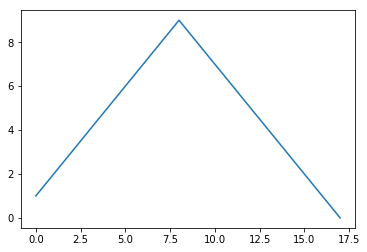

In [96]:
plt.figure
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [97]:
import numpy as np
t= np.arange(0,12,0.01)
y= np.sin(t)

np.arange로 0부터 12까지 0.01간격으로 데이터 생성, 그 값을 sin함수에 입력하여 sin 값 생성

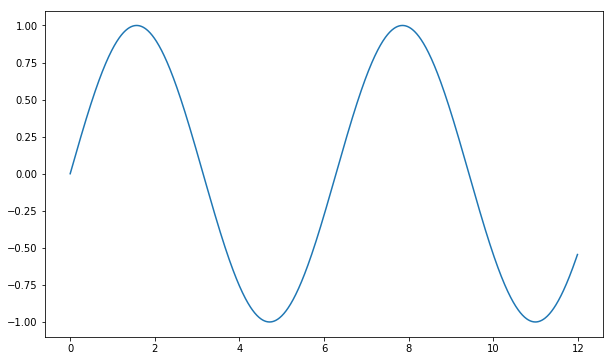

In [98]:
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.show()

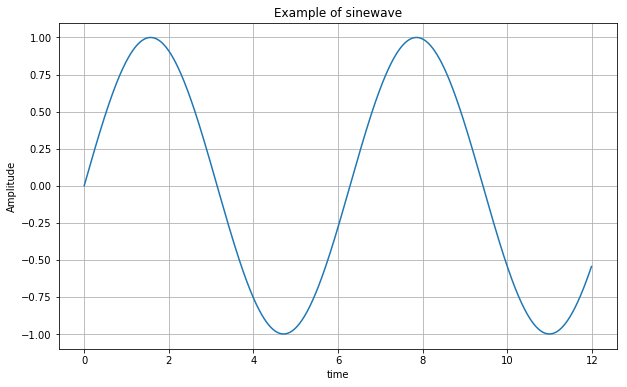

In [99]:
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

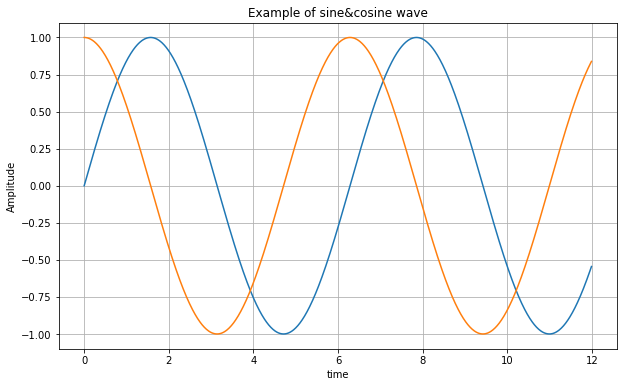

In [100]:
plt.figure(figsize=(10,6))
plt.plot(t,np.sin(t))
plt.plot(t,np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sine&cosine wave')
plt.show()

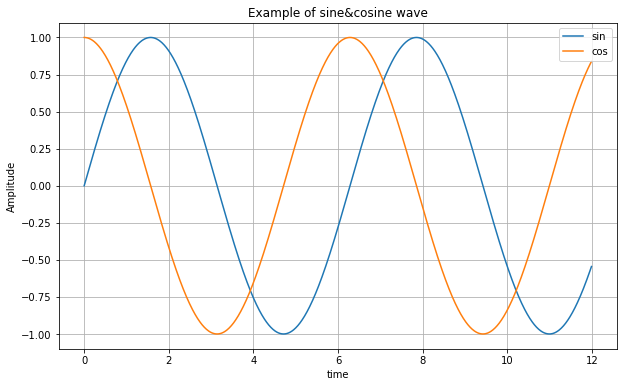

In [101]:
plt.figure(figsize=(10,6))
plt.plot(t,np.sin(t),label='sin')
plt.plot(t,np.cos(t),label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sine&cosine wave')
plt.show()

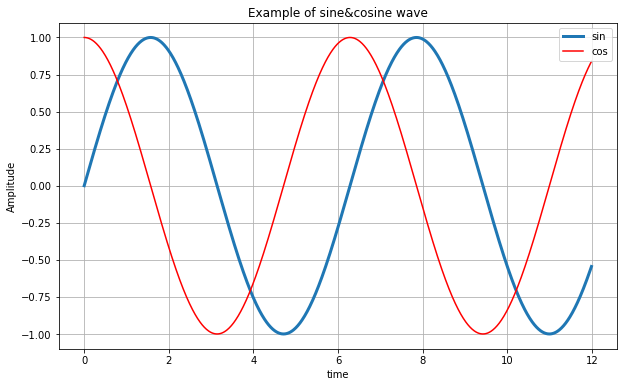

In [102]:
plt.figure(figsize=(10,6))
plt.plot(t,np.sin(t),lw=3,label='sin')
plt.plot(t,np.cos(t),'r',label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sine&cosine wave')
plt.show()

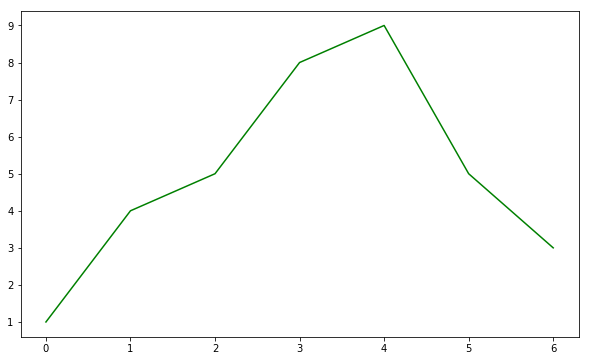

In [103]:
t=list(range(7))
y=[1,4,5,8,9,5,3]
plt.figure(figsize=(10,6))
plt.plot(t,y,color='green')
plt.show()

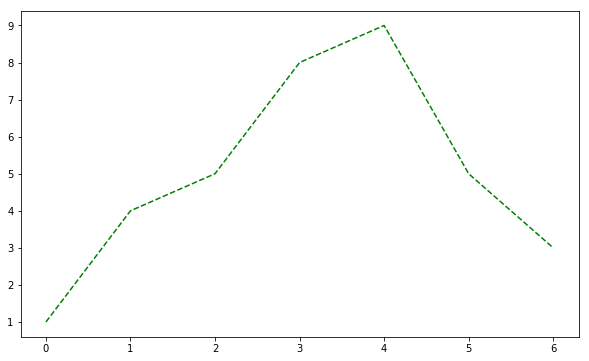

In [104]:
plt.figure(figsize=(10,6))
plt.plot(t,y,color='green',linestyle='dashed')
plt.show()

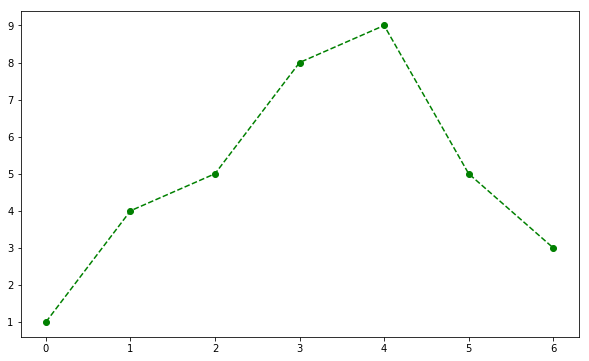

In [105]:
plt.figure(figsize=(10,6))
plt.plot(t,y,color='green',linestyle='dashed',marker='o')
plt.show()

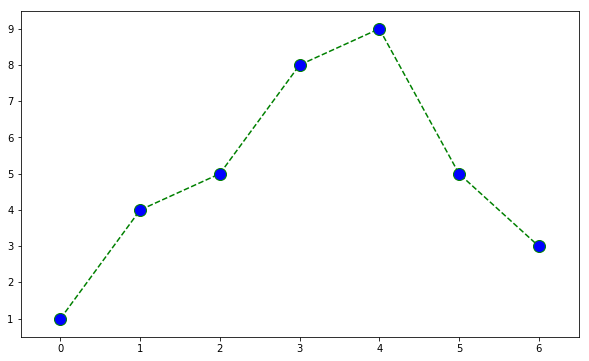

In [106]:
plt.figure(figsize=(10,6))
plt.plot(t,y,color='green',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=12)
plt.xlim([-0.5,6.5])
plt.ylim([0.5,9.5])
plt.show()

scatter명령어로 데이터를 점으로 표시

In [107]:
t=np.array([0,1,2,3,4,5,6,7,8,9])
y=np.array([9,8,7,9,8,3,2,4,3,4])

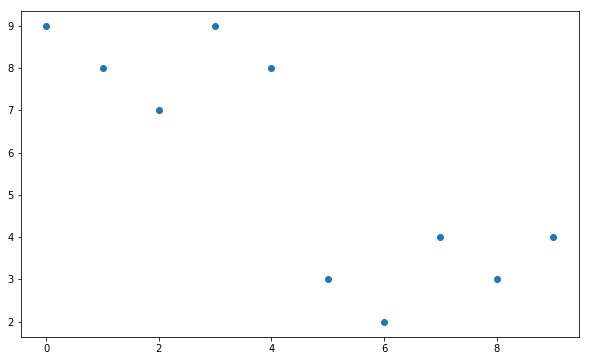

In [108]:
plt.figure(figsize=(10,6))
plt.scatter(t,y)
plt.show()

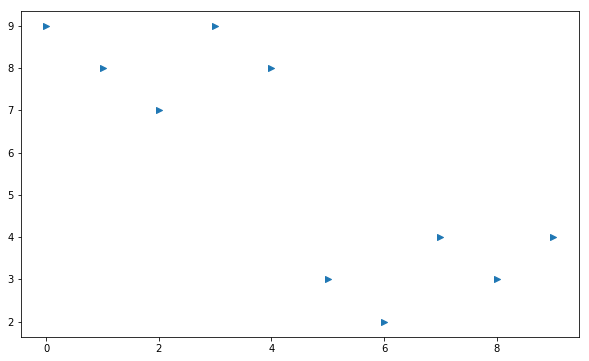

In [109]:
plt.figure(figsize=(10,6))
plt.scatter(t,y,marker='>')
plt.show()

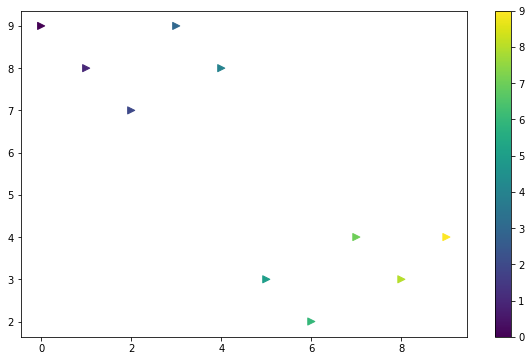

In [110]:
colormap=t

plt.figure(figsize=(10,6))
plt.scatter(t,y,s=50, c=colormap, marker='>')
plt.colorbar()
plt.show()

x축 값에 colormap을 지정, s옵션은 마커의 크기(size)


In [111]:
s1= np.random.normal(loc=0, scale=1, size=1000)
s2= np.random.normal(loc=5, scale=0.5, size=1000)
s3= np.random.normal(loc=10, scale=2, size=1000)

numpy의 random함수로 데이터 생성, loc:평균값, scale:표준편차, size:개수

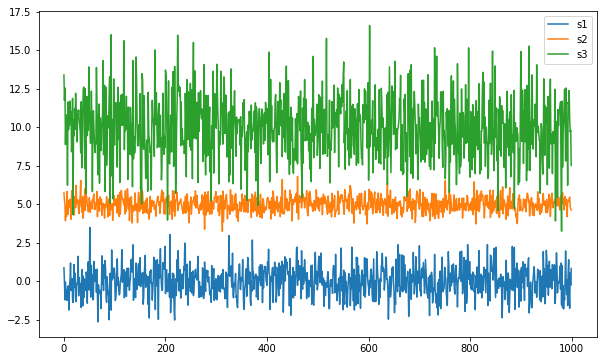

In [112]:
plt.figure(figsize=(10,6))
plt.plot(s1,label='s1')
plt.plot(s2,label='s2')
plt.plot(s3,label='s3')
plt.legend()
plt.show()

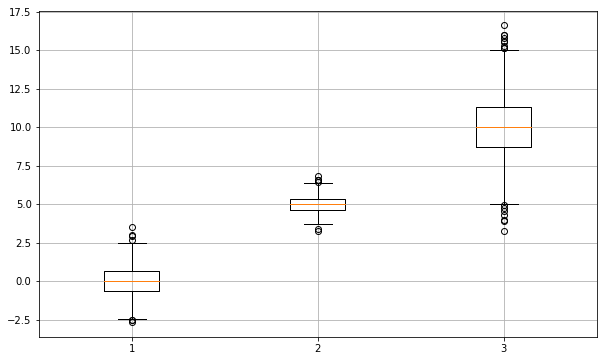

In [113]:
plt.figure(figsize=(10,6))
plt.boxplot((s1,s2,s3))
plt.grid()
plt.show()

boxplot으로 표현했을 때 평균, 표준편차와 최대 최소값을 위와 같이 시각화할 수 있다

In [114]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

if platform.system()=='Darwin':
    rc('font',family='AppleGothic')
elif platform.system()=='Windows':
    path='c:/Windows/Fonts/malgun.ttf'
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown system... sorry~~~~')

matplotlib가 기본으로 가진 폰트는 한글을 지원하지 않으므로 matplotlib의 폰트를 변경해준다

In [115]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


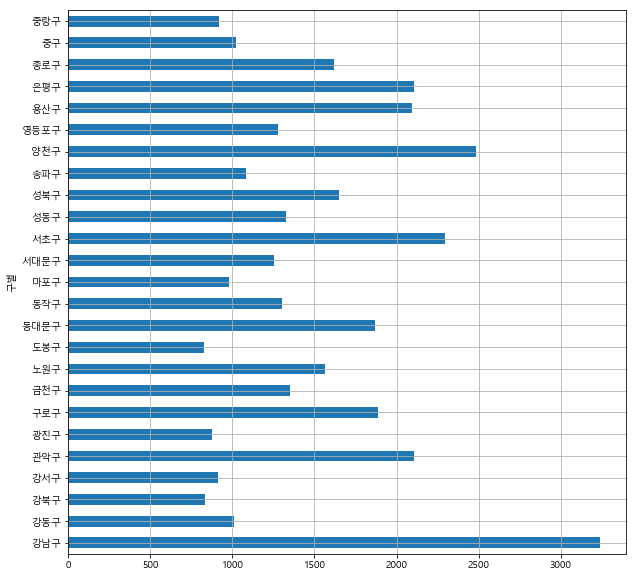

In [116]:
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

pandas 데이터 뒤에 plot 메소드를 붙이면 바로 그릴수 있음, kind=barh로 해서 horizontal bar 형태로 그림

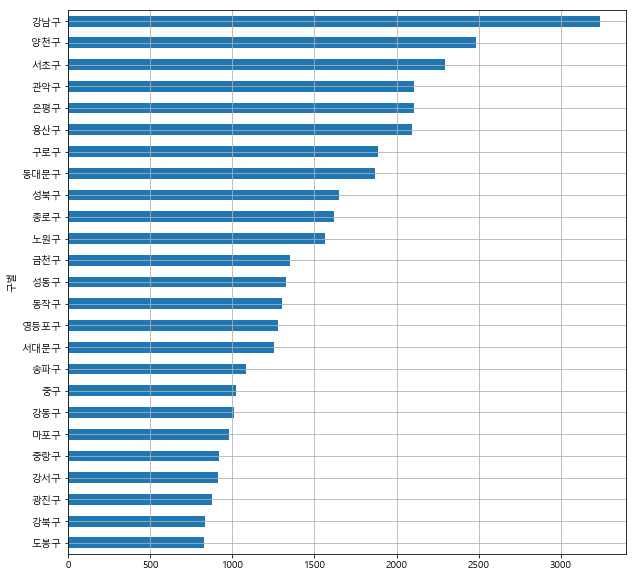

In [117]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

정렬한 데이터를 그래프로 그린 결과

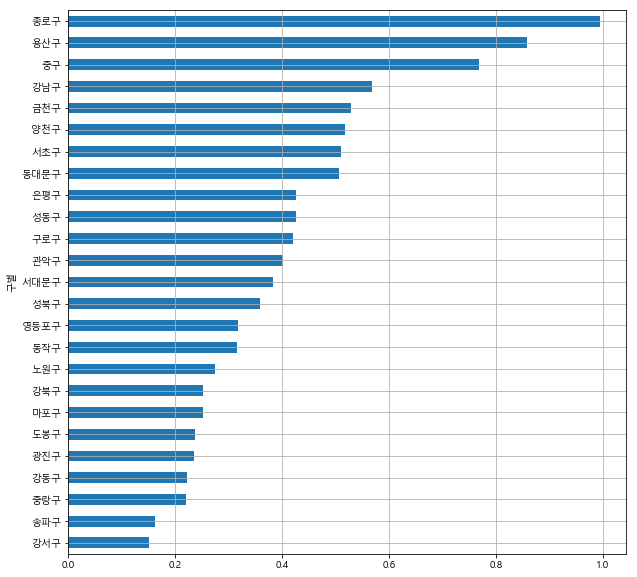

In [118]:
data_result['CCTV비율']= data_result['소계']/data_result['인구수']*100
data_result['CCTV비율'].sort_values().plot(kind='barh',grid=True, figsize=(10,10))
plt.show()

인구 대비 CCTV수를 보니 종로구와 용산구, 중구가 월등히 높고 송파구 강서구가 비율이 낮음을 알수 있다

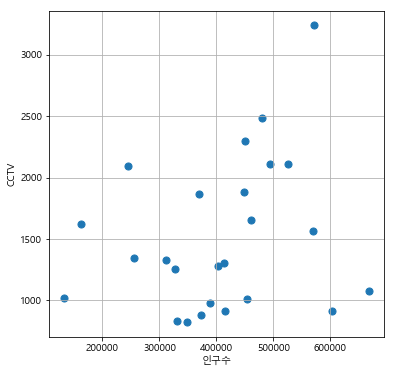

In [119]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [120]:
fp1= np.polyfit(data_result['인구수'],data_result['소계'],1)
fp1

array([  1.15151285e-03,   1.04561312e+03])

polyfit메소드에 (x값, y값, 차수)를 넣어주면 기울기와 y절편의 값이 배열로 반환되어 직선을 그릴수 있게 된다

In [121]:
f1=np.poly1d(fp1)
fx=np.linspace(100000,700000,100)

직선을 그리기 위해 x축 데이터를 numpy의 linspace로 만들고 y값은 polyfit으로 구한 직선의 데이터를 poly1d 다항식 객체로 만들어 연산과 함수로 사용이 가능하게 만든 후 x값을 넣어서 구한다

https://pinkwink.kr/1127 : Numpy의 polyfit과 poly1d 사용법

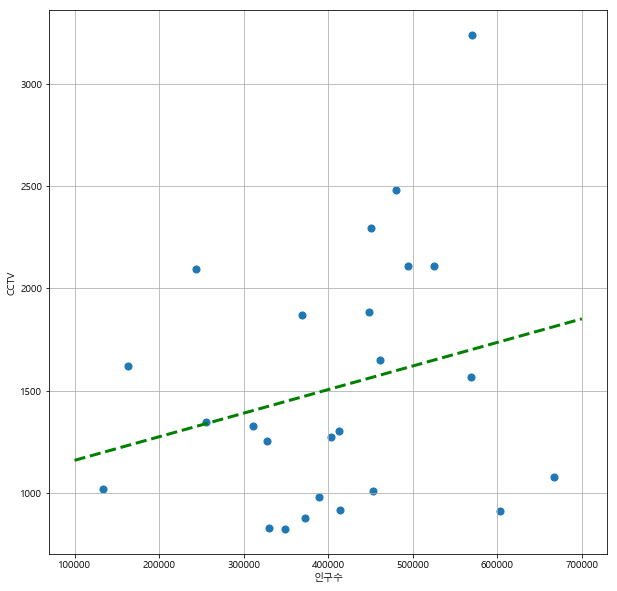

In [122]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'],data_result['소계'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

직선이 전체 데이터의 대표 값 역할을 한다고 할때 직선에서 멀어질수록 다른 색을 나타내고, 오차가 큰 구는 이름이 나타나도록 한다

In [123]:
fp1=np.polyfit(data_result['인구수'],data_result['소계'],1)

f1=np.poly1d(fp1)
fx=np.linspace(100000,700000,100)

data_result['오차']=np.abs(data_result['소계']-f1(data_result['인구수']))

df_sort=data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572,1535.448801
양천구,2482,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.517107,883.686047
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885,829.864334
용산구,2096,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.858302,769.183989
송파구,1081,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.161952,733.228369


plt.text(x좌표,y좌표,string)을 넣어 그림에 text를 추가하고 오차로 color map을 입힌다

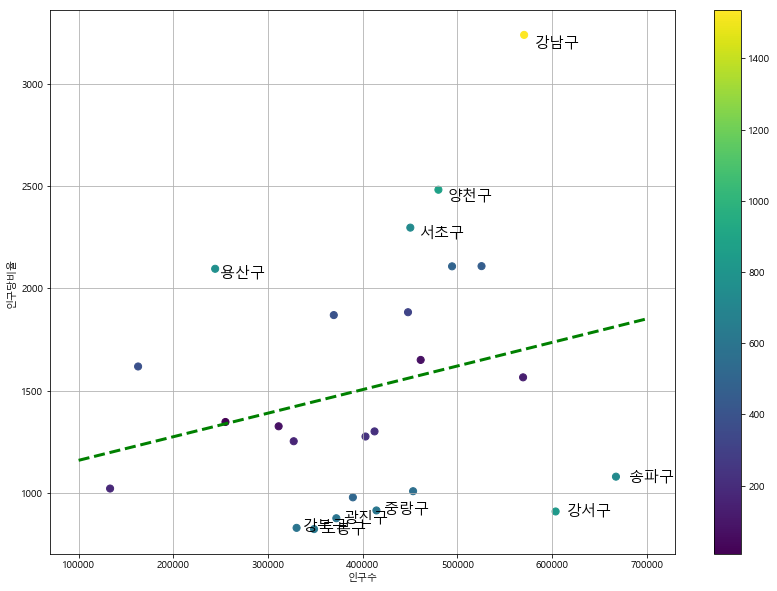

In [124]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'],c=data_result['오차'], s=50)
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
            df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()

직선을 기준으로 위에 있는 강남구 양천구 서초구 용산구는 서울시 전체 지역의 일반적인 경향보다 CCTV가 많이 설치되어 있고 송파구 강서구 중랑구 광진구 도봉구 강북구는 일반적인 경향보다 CCTV가 적게 설치된 지역임을 알수 있고 강남구는 월등히 많은 CCTV가 설치됐지만 송파구, 강서구는 인구수에 비해 너무 적은 수의 CCTV를 가지고 있음을 알 수 있다